# Natural Language Processing

Most of the data we have encountered so far has been numerical (or at least, numerically encoded).

However, one of the most powerful aspects of data science is acknowledging and considering that there are vasts amounts of data available in many other modalities, with potentially valuable information, if the data can be leveraged and analyzed. 

Here, we will introduce natural language processing (NLP), or the computational analysis of text.

<div class="alert alert-success">
Natural Language Processing (NLP) is the approach of analyzing text data, with computers.
</div>

<div class="alert alert-info">
Natural Language Processing on 
<a href="https://en.wikipedia.org/wiki/Natural-language_processing" class="alert-link">wikipedia</a>.
</div>

## NTLK: Natural Language Tool Kit

There are many tools for analyzing text data in Python. Here, we will use one of biggest and most prominent ones: NLTK.

NLTK provides interfaces to over 50 corpora and lexical resources, as well as a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

In this notebook, we will walk through some basic text-analysis using the `NLTK` package.

<div class="alert alert-success">
The Natural Language Tool Kit, or NLTK, is a Python module for text-analysis. 
</div>

<div class="alert alert-info">
The NLTK organization website is 
<a href="http://www.nltk.org/" class="alert-link">here</a>
and they have a whole book of tutorials 
<a href="http://www.nltk.org/book/" class="alert-link">here</a>.
</div>

In [1]:
# Import NLTK
import nltk

In [2]:
# Set an example sentence of 'data' to play with
sentence = "UC San Diego is a great place to study cognitive science."

### Downloading Corpora

To work with text-data, you often need corpora - text datasets to compare to. 

NLTK has many such datasets available, but doesn't install them by default (as the full set of them would be quite large). Below we will download some of these datasets. 

In [3]:
# If you hit an error downloading things in the cell below, come back to this cell, uncomment it, and run this code.
#   This code gives python permission to write to your disk (if it doesn't already have persmission to do so).
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

In [4]:
# Download some useful data files from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /Users/tom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tom/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/tom/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/tom/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /Users/tom/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

## Tokenisation

<div class="alert alert-success">
Tokenization is the process of splitting text data into 'tokens', which are meaningful pieces of data.
</div>

<div class="alert alert-info">
More information on tokenization
<a href="https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html" class="alert-link">here</a>.
</div>

Tokenization can be done at different levels - you can, for example tokenize text into sentences, and/or into words. 

In [5]:
# Tokenize our sentence, at the word level
tokens = nltk.word_tokenize(sentence)

In [6]:
# Check out the word-tokenized data
print(tokens)

['UC', 'San', 'Diego', 'is', 'a', 'great', 'place', 'to', 'study', 'cognitive', 'science', '.']


## Part-of-speech (POS) Tagging

<div class="alert alert-success">
Part-of-Speech tagging is the process of labelling words with respect to their 'types' and relationships to other words.
</div>

<div class="alert alert-info">
Part-of-speech tagging on 
<a href="https://en.wikipedia.org/wiki/Part-of-speech_tagging" class="alert-link">wikipedia</a>.
</div>

In [7]:
# Apply part-of-speech tagging to our sentence
tags = nltk.pos_tag(tokens)

In [8]:
# Check the POS tags for our data
print(tags)

[('UC', 'NNP'), ('San', 'NNP'), ('Diego', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('place', 'NN'), ('to', 'TO'), ('study', 'VB'), ('cognitive', 'JJ'), ('science', 'NN'), ('.', '.')]


In [40]:
# Check out the documentation for describing the abbreviations
nltk.help.upenn_tagset(tagpattern='NNP')
nltk.help.upenn_tagset(tagpattern='DT')
nltk.help.upenn_tagset(tagpattern='JJ')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


## Named Entity Recognition (NER)

<div class="alert alert-success">
Named entity recognition seeks to label words with the kinds of entities that they relate to.
</div>

<div class="alert alert-info">
Named entity recognition on 
<a href="https://en.wikipedia.org/wiki/Named-entity_recognition" class="alert-link">wikipedia</a>.
</div>

In [10]:
# Apply named entity recognition to our POS tags
entities = nltk.chunk.ne_chunk(tags)

In [11]:
# Check out the named entities
print(entities)

(S
  UC/NNP
  (PERSON San/NNP Diego/NNP)
  is/VBZ
  a/DT
  great/JJ
  place/NN
  to/TO
  study/VB
  cognitive/JJ
  science/NN
  ./.)


## Stop words

<div class="alert alert-success">
'Stop words' are the most common words of a language, that we often want to filter out before text analysis. 
</div>

<div class="alert alert-info">
Stop words on 
<a href="https://en.wikipedia.org/wiki/Stop_words" class="alert-link">wikipedia</a>.
</div>

In [12]:
# Check out the corpus of stop words in English
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Text Encoding

In order to analyze text _as_ data, we often need to encode it in some way. 

By encoding here, we just mean choosing a representation of the data, and for text data the goal is to choose a representation that is more amenable for computational analysis. There are many possibilities, and which approach works best depends largely on the context of the data and the analyses to be performed. Choosing how to encode text data is a key topic in NLP. 

Here, we will explore a couple simple encoding approaches, which in this case are basically ways to count the words and measure occurrences in text data. By measuring how often certain words occur, we can characterize the text as numerical data, and open up access to numerical analysis of the data. 

Some common encodings for text data are:
- Bag of Words (BoW)
    - Text is encoded as a collection of words & frequencies
- Term Frequency / Inverse Document Frequency (TF/IDF)
    - TF/IDF is a weighting that stores words with relation to their commonality across a corpus.

Next we will walk through an example of encoding text as BoW and TF-IDF.

In [13]:
# Imports
%matplotlib inline

# Standard Python has some useful string tools
import string

# Collections is a part of standard Python, with some useful data objects
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn has some useful NLP tools, such as a TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Load some Data

The data we will be looking at is a small subset of the BookCorpus dataset. The original dataset can be found here: http://yknzhu.wixsite.com/mbweb.

The original dataset was collected from more than 11,000 books, and has already been tokenised at both the sentence and word level. 

The small subset provided and used here contains the first 10,000 sentences.

In [14]:
# Load the data
with open('files/book10k.txt', 'r') as file:
    sents = file.readlines()

In [15]:
# Check out the data - print out the first and last sentences, as examples
print(sents[0])
print(sents[-1])

the half-ling book one in the fall of igneeria series kaylee soderburg copyright 2013 kaylee soderburg all rights reserved .

alejo was sure the fact that he was nervously repeating mass along with five wrinkly , age-encrusted spanish women meant that stalin was rethinking whether he was going to pay the price .



### Pre-Processing

First, let's do some standard text pre-processing.

In [16]:
# Preprocessing: strip all extra whitespace from the sentences
sents = [sent.strip() for sent in sents]

Let's first take a look at the word frequencies in this data.

To do so, we can tokenize the text, count occurences, and then we can have a look at the most frequent words in the dataset. 

In [17]:
# Tokenize all the sentences into words
#  This collects all the word tokens together into one big list
tokens = []
for x in sents:
    tokens.extend(nltk.word_tokenize(x))

In [18]:
# Check out how many words are in the data
print('Number of words in the data: \t', len(tokens))
print('Number of unique words: \t', len(set(tokens)))

Number of words in the data: 	 140094
Number of unique words: 	 8221


### Bag-of-Words

Next, let's try a 'bag-of-words' representation of the data. 

After tokenization, a 'bag-of-words' can be computed by counting how often each token occurs, which we can do with the `Counter` object. 

<div class="alert alert-success">
A 'bag of words' model, of representation, is way to represent text data by counting occurences of tokens.
</div>

<div class="alert alert-info">
Bag of words on 
<a href=https://en.wikipedia.org/wiki/Bag-of-words_model class="alert-link">wikipedia</a>.
</div>

In [19]:
# Use the 'counter' object to count how many times each word appears
counts = Counter(tokens)

Now, we can explore the counter object, which is basically a 'bag-of-words' representation of the data. 

Note that in this encoding we have lost word order and grammar. All we have is a collection of words. 

This representation is quite different from how humans interact with language, but can be useful for some analyses. 

What we do have is a list of all the words present, and how often they appear. Basically, we have turned the text into a _distribution_ and we can try and analyze this distribution to try and programmatically analyze the text. 

In [20]:
# Check out the counts object, printing out some of the most common tokens
counts.most_common(25)

[('.', 8601),
 (',', 6675),
 ('the', 6062),
 ('and', 3382),
 ('to', 3328),
 ('``', 2852),
 ('i', 2747),
 ('a', 2480),
 ('of', 2122),
 ('was', 1752),
 ('he', 1678),
 ('in', 1616),
 ('you', 1483),
 ('her', 1353),
 ('his', 1349),
 ('?', 1153),
 ('she', 1153),
 ('that', 1134),
 ('it', 1050),
 ("'s", 1023),
 ('had', 898),
 ('with', 894),
 ('alejo', 890),
 ('wara', 875),
 ('at', 818)]

One thing you might notice if you scroll through the word list above is that it still contains punctuation. Let's remove those.

In [21]:
# The 'string' module (standard library) has a useful list of punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
# Drop all punction markers from the counts object
for punc in string.punctuation:
    if punc in counts:
        counts.pop(punc)

In [23]:
# Get the top 10 most frequent words
top10 = counts.most_common(10)

In [24]:
# Extract the top words, and counts
top10_words = [it[0] for it in top10]
top10_counts = [it[1] for it in top10]

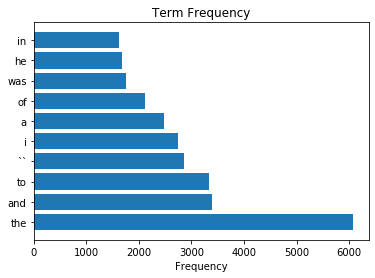

In [25]:
# Plot a barplot of the most frequent words in the text
plt.barh(top10_words, top10_counts)
plt.title('Term Frequency');
plt.xlabel('Frequency');

As we can see, 'the', 'was', 'a', etc. appear a lot in the document. 

However, these frequently appearing words aren't particularly useful for figuring out what these documents are about.

They do not really help us to understand this text data. 

These words are all 'stop words', so let's drop them from the dataset. 

In [26]:
# Drop all stop words
for stop in nltk.corpus.stopwords.words('english'):
    if stop in counts:
        counts.pop(stop)

In [27]:
# Get the top 20 most frequent words, of the stopword-removed data
top20 = counts.most_common(20)

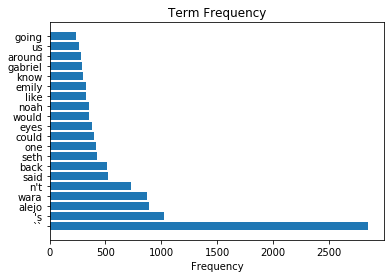

In [28]:
# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in top20], [it[1] for it in top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

This looks potentially more relevant / useful! 

As a distribution of meaningful word, bag-of-word representations can be used to analyze text data in various ways.

If you are interested in further analysis of this data, look through the `nltk` tutorials for further analyses.

### Term Frequency - Inverse Document Frequency (TF-IDF)

Finally, let's look at another approach for encoding text data - term frequency / inverse document frequency.

Note that TF-IDF is a similar kind of word counting to bag-of-words. 

First, let's consider a difficulty with bag-of-words encodings, which is it's difficult to interpret the word counts. For example, knowing a word occurs 10 times isn't itself really enough information to understand something about the document the word come from. If that document is 100 words long, that word seems like it must be quite important. But if the document is 10,000 words long, then this word seems less important. 

TF-IDF tries to address this, and does so by scaling the counts of words by the typical occurrence. 

- The term-frequency is the count of the term in the document, which is the same as in the bag-of-words. 

- The inverse-document-frequency is a measurement of how commonly the term occurs across a corpus. 
  - Since it's calculated as an inverse, a higher IDF score is a rarer word. 

The TF-IDF score is calculated by multiplying the TF by the IDF. One way to think of this is that it normalizes, or scales, term occurrences in a document by a population measure of the occurrence of the term. 

This allows for a representation of the text data which indicates if terms in the document of interest occur more or less frequently than expected (given a corpus). A high TF-IDF score could occur, for example, due to a relatively large number of occurrences of a typically rare term. This may be an interesting and useful feature to describe the text.

Here, we will briefly examine applying TF/IDF to text data. Note that in this case, we are using an object from `sklearn` that can be used to compute the TF/IDF. 

<div class="alert alert-success">
Term Frequency - Inverse Document Frequency is representation of text data that scales term occurrences by corpus statistics.
</div>

<div class="alert alert-info">
TF-IDF on 
<a https://en.wikipedia.org/wiki/Tf%E2%80%93idf class="alert-link">wikipedia</a>.
</div>

In [29]:
# Initialize a TFIDF object, applying some settings
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

The TfidfVectorizer will calculate the inverse document frequency (IDF) for each word across our corpus of words. 

The TFIDF for each term, for a particular document, can then be calculated as TF * IDF.  

In [30]:
# Learn the TFIDF representation of our data
#   Note that this takes the raw sentences, tokenizes them, and learns the TF/IDF representation
tdidf = tfidf.fit(sents)

Before we apply this representation to our data, let's explore what the data object and calculated scores. 

If you explore the tfidf object you'll see it includes attributes:
- `vocabulary_`, which maps the terms to their indices
- `idf_`, which has the IDF values for each term. 

Let's now plot out the IDF for each of the top 10 most frequently appeared words (from the first analysis). 

In [31]:
# Get the IDF weights for the top 10 most common words
IDF_weights = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top10_words]

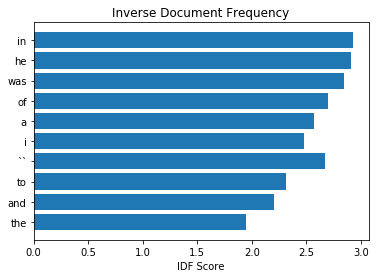

In [32]:
# Plot the IDF scores for the very common words
plt.barh(top10_words, IDF_weights)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

We compare the plot with the following plot that shows the words with top 10 highest IDF.

In [33]:
# Get the terms with the highest IDF score
inds = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores = tfidf.idf_[inds]

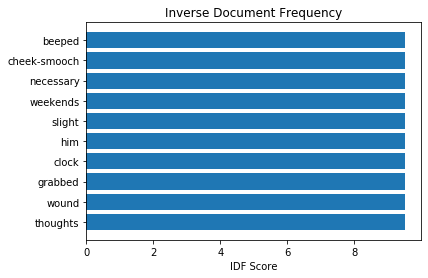

In [34]:
# Plot the terms with the highest IDF score
plt.barh(top_IDF_tokens, top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

As we can see, comparing across the two plots, the frequently appearing words have much lower values for their IDF scores, as compared to much rarer words. This is basically by definition, for the IDF score. 

What this means for TF-IDF is that the weighting helps account for which words in a document are specific to that document. Because the TF and IDF values are multiplied, rare terms get a higher TF-IDF score, per occurrence, than common words, which helps to compare across terms and documents. Ultimately, this allows us to represent a document by distribution of terms that are most unique to the particular document, as compared to the average across the corpus. 

#### Applying TF-IDF

Now that we have learned the frequencies, we can apply this representation to our data. 

In the next line, we will apply the TF-IDF representation to our data, and convert this to an array. 

This array is an `n_documents` x `n_terms` matrix that encodes the documents in a TFIDF representation.

Note that in our TFIDF object above we set the number of features to use as 5000, which is the number of terms. 

In [35]:
# Apply TF/IDF representation to our data
tfidf_books = tdidf.transform(sents).toarray()

In [36]:
print("Number of documents: \t\t", len(sents))
print("Number of terms: \t\t", len(tfidf.vocabulary_))
print("TFIDF representation shape: \t", tfidf_books.shape)

Number of documents: 		 10000
Number of terms: 		 5000
TFIDF representation shape: 	 (10000, 5000)


In the TFIDF array, each row stores a representation of the document based on the TF-IDF score of our 5000 terms. 

This is a new representation of our text data, a numerical one, that we could now use for analysis and comparison of text data. 

## Conclusion

Text analysis and NLP is itself a huge field, and an area in which one can take whole classes or research programs. 

Here, we have introduced some of the core idea related to NLP. For more information on these topics, look into NLP focused resources and classes.